In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime
import pandas_datareader.data as web
sns.set_style('whitegrid')

In [3]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

start = datetime.datetime(2019,1,1)
end   = datetime.datetime(2019,12,30)

In [4]:
for stocks in tech_list:
    globals()[stocks]=web.DataReader(stocks,'yahoo',start,end)

In [5]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-12-31 to 2019-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

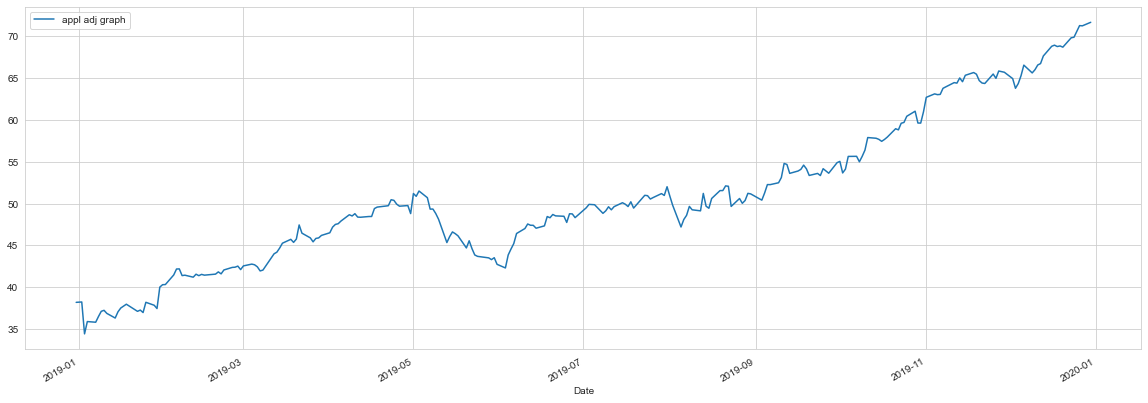

In [6]:
AAPL['Adj Close'].plot(label='appl adj graph',figsize=(20,7),legend=True)


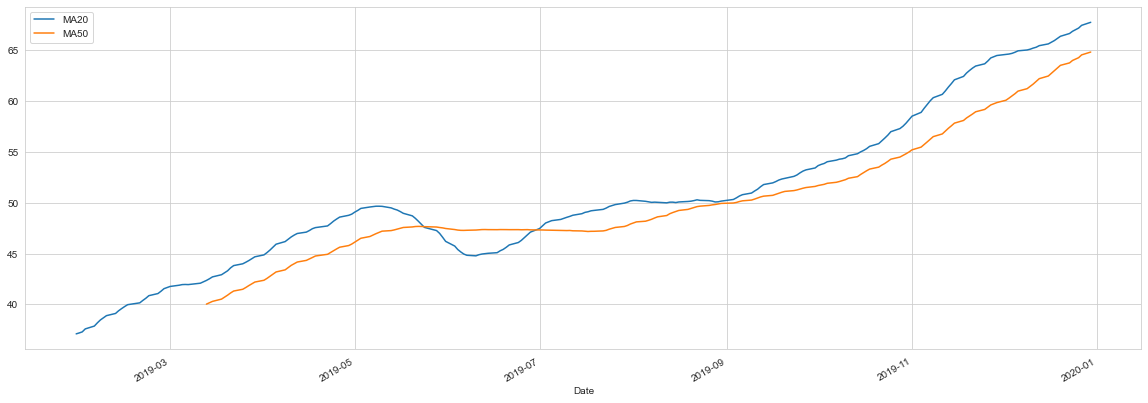

In [12]:
#for moving average

AAPL['MA20'] = AAPL['Adj Close'].rolling(20).mean()
AAPL['MA20'].plot(figsize=(20,7))
AAPL['MA50'] = AAPL['Adj Close'].rolling(50).mean()
AAPL['MA50'].plot(figsize=(20,7))

plt.legend()

<AxesSubplot:xlabel='Date'>

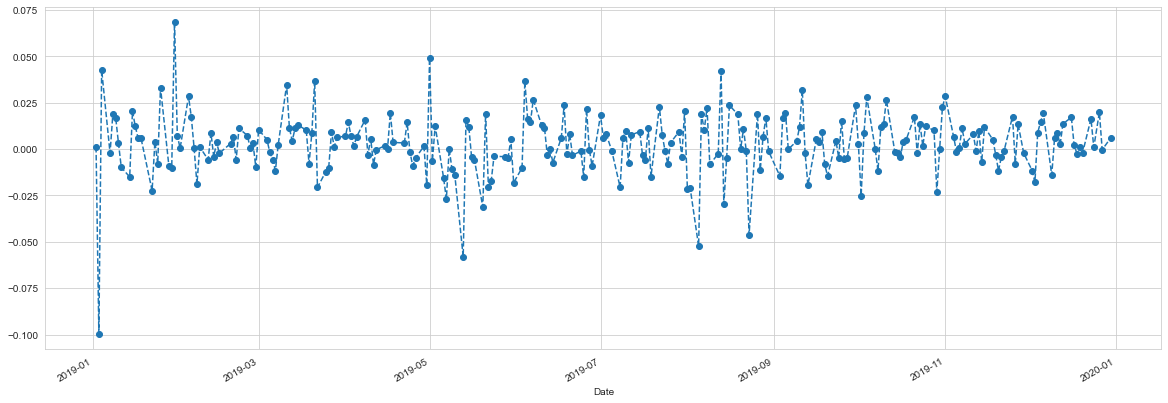

In [13]:

#to check how much percent return you got whether low or high

AAPL['high return'] = AAPL['Adj Close'].pct_change()
AAPL['high return'].plot(figsize=(20,7),linestyle='--',marker='o')

C:\Users\subham\Anaconda3\envs\pandas_room\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='high return', ylabel='Density'>

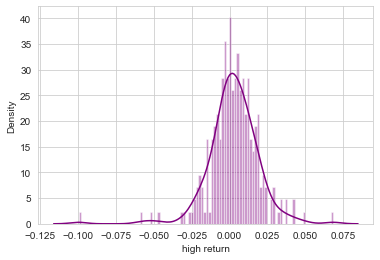

In [14]:
#to check the risk on stock
#distplot can  plcae two plot on top of each other

sns.distplot(AAPL['high return'].dropna(),bins=100,color = 'purple')

In [15]:
closing_df= web.DataReader(tech_list,'yahoo',start,end)['Adj Close']


In [16]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2018-12-31,38.205803,1035.609985,99.040863,1501.969971
2019-01-02,38.249401,1045.849976,98.602066,1539.130005
2019-01-03,34.439476,1016.059998,94.974693,1500.280029
2019-01-04,35.909672,1070.709961,99.391899,1575.390015
2019-01-07,35.829746,1068.390015,99.518669,1629.510010


In [17]:
tech_returns = closing_df.pct_change().dropna()
tech_returns.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-01-02,0.001141,0.009888,-0.004430,0.024741
2019-01-03,-0.099607,-0.028484,-0.036788,-0.025242
2019-01-04,0.042689,0.053786,0.046509,0.050064
2019-01-07,-0.002226,-0.002167,0.001275,0.034353
2019-01-08,0.019063,0.007385,0.007251,0.016612


C:\Users\subham\Anaconda3\envs\pandas_room\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


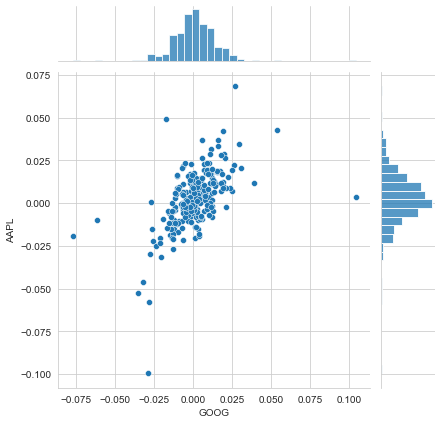

In [18]:
#to compare two stocks in a plot

sns.jointplot('GOOG','AAPL',tech_returns)


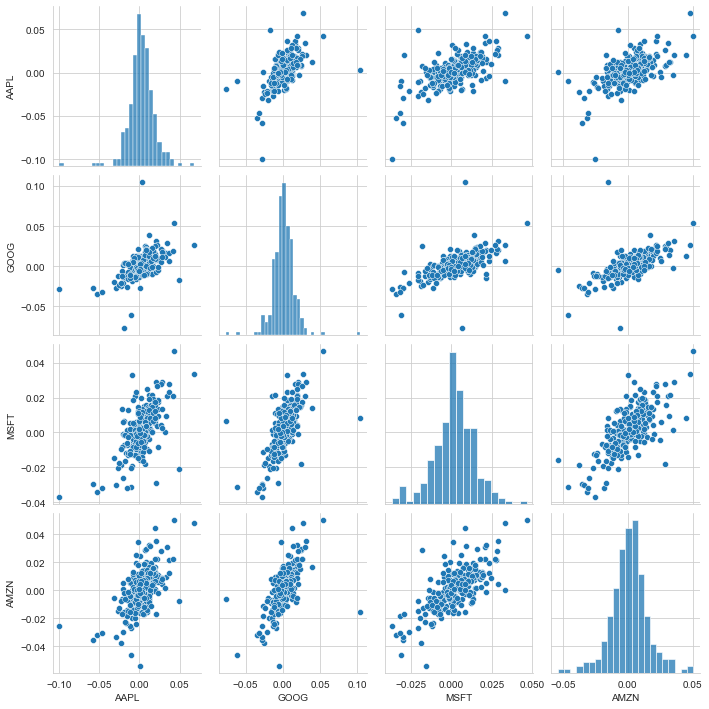

In [19]:

sns.pairplot(tech_returns.dropna())


### Risk Analysis

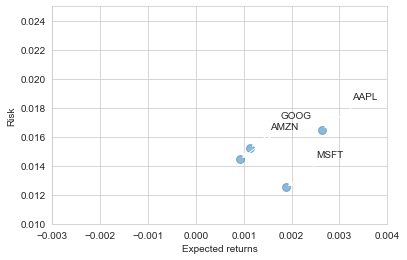

In [63]:
rets = tech_returns.dropna()





plt.ylim([0.01,0.025])
plt.xlim([-0.003,0.004])


plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)
plt.xlabel('Expected returns')
plt.ylabel('Risk')


for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y),textcoords = 'offset points',
        xytext=(30,30),
         
        arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=0.0'),)

C:\Users\subham\Anaconda3\envs\pandas_room\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='high return', ylabel='Density'>

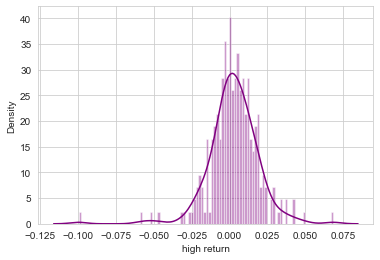

In [65]:
sns.distplot(AAPL['high return'].dropna(),bins=100,color='purple')

In [66]:
## the risk value of the stock
rets['AAPL'].quantile(0.05)

-0.020661184041934344